In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O4','C4']
psi_dihedral=['C1','O4','C4','C5']

di_sugar=['MAN', 'NAG']
di_sugar2= ['DManpa', 'DGlcpNAcb']
link= '1-4'
patterns1= [di_sugar[0]+'(*_*_)]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-'+di_sugar[1]+'(*_*_)',di_sugar[0]+'(*_*_)]-[*]-'+di_sugar[1]+'(*_*_)', di_sugar[0]+'(*_*_)-[*]-'+di_sugar[1]+'(*_*_)']
patterns2= [di_sugar2[0]+link+di_sugar2[1], di_sugar2[0]+link+']'+di_sugar2[1], di_sugar2[0]+link+'[*]'+di_sugar2[1]]
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-4D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A14', '1A3K', '1A47', '1A47', '1A47', '1A7L', '1A7L', '1ABR', '1ABR', '1AGM', '1AGM', '1AGM', '1AH1', '1AH1', '1AHP', '1AHP', '1AIV', '1ANF', '1APY', '1APZ', '1ATN', '1AX0', '1AX1', '1AX1', '1AX2', '1AX2', '1AXM', '1AXM', '1AXM', '1AXY', '1AXZ', '1AZX', '1AZX', '1B1Y', '1B2Y', '1B2Y', '1B37', '1B3W', '1B5F', '1B5F', '1B5F', '1B5F', '1B9Z', '1B9Z', '1B9Z', '1B9Z', '1BAG', '1BCR', '1BCS', '1BFB', '1BFC', '1BG9', '1BHG', '1BHG', '1BJI', '1BLF', '1BLF', '1BYB', '1BYB', '1BYC', '1BYD', '1BYD', '1BZB', '1BZW', '1BZW', '1BZW', '1BZW', '1C1L', '1C1Z', '1C1Z', '1C1Z', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4Q', '1C4S', '1CAP', '1CB8', '1CDG', '1CDG', '1CDG', '1CF3', '1CF5', '1CF5', '1CGU', '1CGV', '1CGV', '1CGV', '1CGW', '1CGW', '1CGW', '1CGX', '1CGX', '1CGX', '1CGY', '1CGY', '1CGY', '1CIW', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CPO', '1CPU', '1CPU', '1CQD', '1CQF', '1CQF', '1CQF', '1CQF

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 10 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 10 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 996 
valid torsion1 and torsion2: (996, 996)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['3.B', '2.B'], ['4C1', '-'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['3.E', '2.E'], ['1S5', '-'])
(['3.D', '2.D'], ['4C1', '4C1'])
(['3.B', '2.B'], ['-', '4C1'])
(['3.F', '2.F'], ['-', '4C1'])
(['3.i', '2.i'], ['BO3', '4C1'])
(['3.j', '2.j'], ['BO3', '4C1'])
(['3.X', '2.X'], ['BO3', '4C1'])
(['3.N', '2.N'], ['BO3', '4C1'])
(['3.M', '2.M'], ['-', '4C1'])
(['3.Y', '2.Y'], ['BO3', '4C1'])
(['3.Y', '2.Y'], ['-', '4C1'])
(['3.B', '2.B'], ['-', '-'])
(['3.C', '2.C'], ['-', '4C1'])
(['3.D', '2.D'], ['1S3', '2SO'])
(['3.B', '2.B'], ['-', 'BO3'])
(['3.C', '2.C'], ['4C1', '-'])
(['3.G', '2.G'], ['1S3', '4C1'])
(['3.J', '2.J'], ['1S3', '4C1'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['3.I', '2.I'], ['1S3', '4C1'])
(['3.F', '2.F'], ['-', '4C1'])
(['3.K', '2.K'], ['-', '4C1'])
(['3.J', '2.J'], ['1S3', '4C1'])
(['3.D', '2.D'], ['1S3', '4C1'])
(['3.M', '2.M'], ['1S3', '4C1'])
(['3.N', '2.N'], ['1S3', '4C1'])
(['3.H', '2.H'], ['4C1', '4C1'])
(['3.D', '2.D'], ['O3B', '4C1'])
(['3.L', '2.L'], ['-', '4C1'])
(['3.

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//2aey.pdb B MAN 3 C1
../../pdbs//2aey.pdb B NAG 2 O4
4304 4300
Connection found between 4304 and 4300
../../pdbs//8c1b.pdb B MAN 3 C1
../../pdbs//8c1b.pdb B NAG 2 O4
12565 12561
Connection found between(2) 12565 and 12561
../../pdbs//5fuj.pdb E MAN 3 C1
../../pdbs//5fuj.pdb E NAG 2 O4
3743 3739
Connection found between 3743 and 3739
../../pdbs//5u8q.pdb D MAN 3 C1
../../pdbs//5u8q.pdb D NAG 2 O4
8598 8594
Connection found between 8598 and 8594
../../pdbs//3v7m.pdb B MAN 3 C1
../../pdbs//3v7m.pdb B NAG 2 O4
1699 1695
Connection found between 1699 and 1695
../../pdbs//3ry6.pdb F MAN 3 C1
../../pdbs//3ry6.pdb F NAG 2 O4
5068 5064
Connection found between 5068 and 5064
../../pdbs//7n1u.pdb i MAN 3 C1
../../pdbs//7n1u.pdb i NAG 2 O4
26237 26233
Connection found between(2) 26237 and 26233
../../pdbs//7n1u.pdb j MAN 3 C1
../../pdbs//7n1u.pdb j NAG 2 O4
26276 26272
Connection found between(2) 26276 and 26272
../../pdbs//7n1u.pdb X MAN 3 C1
../../pdbs//7n1u.pdb X NAG 2 O4
25897 25893

In [13]:
outfile_name = di_sugar2[0]+link+di_sugar2[1]

In [14]:
output_df.to_csv(outfile_name+'_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv(outfile_name+'_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [15]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [16]:
output_df

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,2aey.pdb,B MAN 3 C2 C1 NAG 2 O4 C4,B MAN 3 C1 NAG 2 O4 C4 C5,277.51170,252.0850,"([MAN(3_B_), NAG(2_B_)], [36.35, 26.22])",MAN(3_B_)-NAG(2_B_)-NAG(1_B_)-ASN(513_A_),DManpa1-4DGlcpNAcb1-4DGlcpNAca1-ASN,"([3.B, 2.B], [4C1, -])"
1,8c1b.pdb,B MAN 3 C2 C1 NAG 2 O4 C4,B MAN 3 C1 NAG 2 O4 C4 C5,258.71700,233.9760,"([MAN(3_B_), NAG(2_B_)], [100.28, 85.17])",MAN(3_B_)-NAG(2_B_)-NAG(1_B_)-ASN(42_R_),DManpa1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([3.B, 2.B], [4C1, 4C1])"
2,5fuj.pdb,E MAN 3 C2 C1 NAG 2 O4 C4,E MAN 3 C1 NAG 2 O4 C4 C5,265.01740,218.2660,"([MAN(3_E_), NAG(2_E_)], [71.69, 52.97])",MAN(3_E_)-NAG(2_E_)-NAG(1_E_)-ASN(122_B_),DManpa1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([3.E, 2.E], [1S5, -])"
3,5u8q.pdb,D MAN 3 C2 C1 NAG 2 O4 C4,D MAN 3 C1 NAG 2 O4 C4 C5,249.54500,72.4700,"([MAN(3_D_), NAG(2_D_)], [243.36, 203.84])",MAN(4_D_)-MAN(3_D_)-NAG(2_D_)-NAG(1_D_)-ASN(57...,DManpa1-4DManpa1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([3.D, 2.D], [4C1, 4C1])"
4,3v7m.pdb,B MAN 3 C2 C1 NAG 2 O4 C4,B MAN 3 C1 NAG 2 O4 C4 C5,213.25700,94.0821,"([MAN(3_B_), NAG(2_B_)], [67.33, 67.53])",GAL(6_B_)-NAG(5_B_)-MAN(4_B_)-[NAG(8_B_)-MAN(7...,DGalpb1-4DGlcpNAcb1-2DManpa1-6[DGlcpNAcb1-2DMa...,"([3.B, 2.B], [-, 4C1])"
...,...,...,...,...,...,...,...,...,...
952,4mqf.pdb,C MAN 3 C2 C1 NAG 2 O4 C4,C MAN 3 C1 NAG 2 O4 C4 C5,131.85400,229.8620,"([MAN(3_C_), NAG(2_C_)], [83.5, 69.76])",FUC(6_C_)-[MAN(5_C_)-[MAN(4_C_)]-MAN(3_C_)-NAG...,DManpa1-3[DManpa1-6]DManpa1-4DGlcpNAcb1-4[LFuc...,"([3.C, 2.C], [1S3, 2H3])"
953,4mqf.pdb,D MAN 3 C2 C1 NAG 2 O4 C4,D MAN 3 C1 NAG 2 O4 C4 C5,285.35220,237.3830,"([MAN(3_D_), NAG(2_D_)], [98.02, 79.99])",FUC(4_D_)-[MAN(3_D_)-NAG(2_D_)]-NAG(1_D_)-ASN(...,DManpa1-4DGlcpNAcb1-4[LFucpa1-6]DGlcpNAcb1-ASN,"([3.D, 2.D], [-, -])"
954,5z14.pdb,F MAN 3 C2 C1 NAG 2 O4 C4,F MAN 3 C1 NAG 2 O4 C4 C5,193.16500,143.7810,"([MAN(3_F_), NAG(2_F_)], [93.49, 58.05])",MAN(4_F_)-MAN(3_F_)-NAG(2_F_)-NAG(1_F_)-ASN(29...,DManpa1-6DManpa1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([3.F, 2.F], [-, 4C1])"
955,3tzi.pdb,D MAN 3 C2 C1 NAG 2 O4 C4,D MAN 3 C1 NAG 2 O4 C4 C5,232.75600,230.5810,"([MAN(3_D_), NAG(2_D_)], [64.34, 48.15])",MAN(3_D_)-NAG(2_D_)-NAG(1_D_)-ASN(144_A_),DManpa1-4DGlcpNAcb1-4DGlcpNAcb1-ASN,"([3.D, 2.D], [4C1, 4C1])"


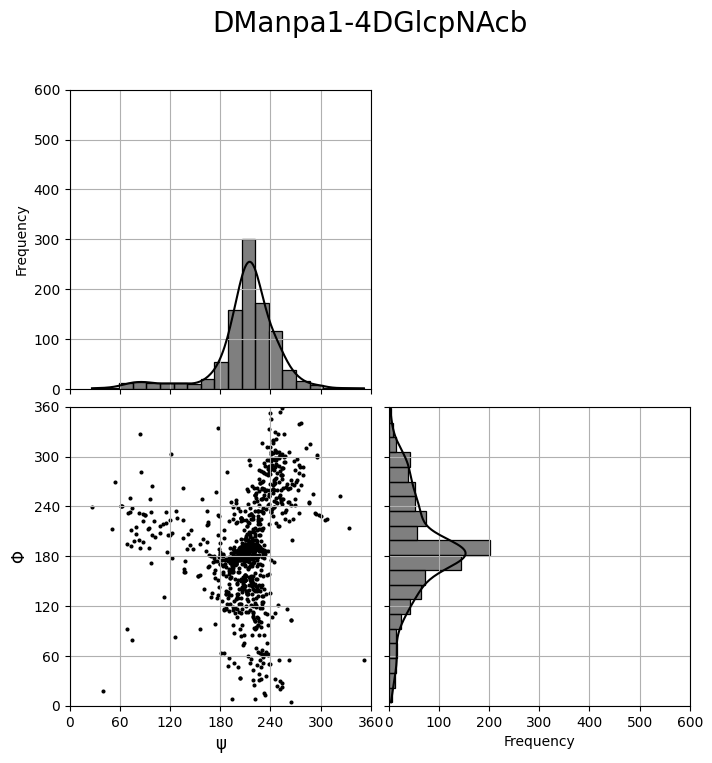

In [18]:
instant1.plot(torsions=output_df, title=outfile_name,max_histogram_scale=600,step_histogram_tick=100)